In [1]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy

In [2]:
main_vcf_files = Path("./nextflow_enrichment/result/main-vcf-summaries/").glob("*_summary.json")
main_vcf_entries = []
for main_vcf_file in main_vcf_files:
    with main_vcf_file.open("r") as f:
        afbin = main_vcf_file.name.split("_")[0]
        main_vcf_json = json.load(f)
        main_vcf_df = pd.DataFrame(main_vcf_json)
        main_vcf_df["afbin"] = afbin
        main_vcf_df["category"] = main_vcf_df["svtype"] + "/" + main_vcf_df["feature"]
        main_vcf_entries.append(main_vcf_df)

main_vcf_df = pd.concat(main_vcf_entries, ignore_index=True)
# Missing entry in ('rare', 'DEL', 'prom') setting it to 1 count for log2-transform
insert_1_row = {'svtype': 'DEL', 'feature': 'prom' , 'afbin': 'rare', 'count': 1 , "category": 'DEL/prom'}
main_vcf_df = main_vcf_df._append(insert_1_row, ignore_index = True)

main_vcf_df.sort_values(["afbin", "category"], inplace=True)

len(main_vcf_df)

45

In [3]:
main_vcf_df["log-count"] = main_vcf_df["count"].apply(lambda x : math.log2(x) )
main_vcf_df["category2"] = main_vcf_df["feature"] + "/" + main_vcf_df["svtype"] 
main_vcf_df["category3"] = main_vcf_df["feature"] + "/" + main_vcf_df["afbin"] 
main_vcf_df["category4"] = main_vcf_df["svtype"] + "/" + main_vcf_df["afbin"] 
main_vcf_df["category5"] = main_vcf_df["afbin"] + "/" + main_vcf_df["svtype"] 
main_vcf_df["category6"] = main_vcf_df["afbin"] + "/" + main_vcf_df["feature"] 

main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6
22,DEL,CTCF,84,common,DEL/CTCF,6.392317,CTCF/DEL,CTCF/common,DEL/common,common/DEL,common/CTCF
27,DEL,K4m3,36,common,DEL/K4m3,5.169925,K4m3/DEL,K4m3/common,DEL/common,common/DEL,common/K4m3
21,DEL,enhD,487,common,DEL/enhD,8.927778,enhD/DEL,enhD/common,DEL/common,common/DEL,common/enhD
18,DEL,enhP,55,common,DEL/enhP,5.781360,enhP/DEL,enhP/common,DEL/common,common/DEL,common/enhP
29,DEL,prom,7,common,DEL/prom,2.807355,prom/DEL,prom/common,DEL/common,common/DEL,common/prom
15,DUP,CTCF,105,common,DUP/CTCF,6.714246,CTCF/DUP,CTCF/common,DUP/common,common/DUP,common/CTCF
19,DUP,K4m3,81,common,DUP/K4m3,6.339850,K4m3/DUP,K4m3/common,DUP/common,common/DUP,common/K4m3
17,DUP,enhD,653,common,DUP/enhD,9.350939,enhD/DUP,enhD/common,DUP/common,common/DUP,common/enhD
25,DUP,enhP,81,common,DUP/enhP,6.339850,enhP/DUP,enhP/common,DUP/common,common/DUP,common/enhP
24,DUP,prom,19,common,DUP/prom,4.247928,prom/DUP,prom/common,DUP/common,common/DUP,common/prom


In [4]:
n = 5

diverging_colors = sns.color_palette("Blues", n) + sns.color_palette("Oranges", n) + sns.color_palette("Greens", n) + sns.color_palette("Purples", n) + sns.color_palette("Reds", n) + sns.color_palette("Greys", n)

In [13]:
iter_files = Path("./nextflow_enrichment/result/iter-summaries/").glob("*_summary.json")
iter_dfs = []
for iter_file in iter_files:
    with iter_file.open("r") as f:
        afbin = iter_file.name.split("_")[0]
        iter_json = json.load(f)
        iter_df = pd.DataFrame(iter_json)
        iter_df["afbin"] = afbin
        iter_df["category"] = iter_df["svtype"] + "/" + iter_df["feature"]
        iter_dfs.append(iter_df)

iter_df = pd.concat(iter_dfs, ignore_index=True)
iter_df.sort_values(["afbin", "category"], inplace=True)

In [14]:
iter_df["log-count"] = iter_df["count"].apply(lambda x : math.log2(x) )

iter_df["category2"] = iter_df["feature"] + "/" + iter_df["svtype"] 
iter_df["category3"] = iter_df["feature"] + "/" + iter_df["afbin"] 
iter_df["category4"] = iter_df["svtype"] + "/" + iter_df["afbin"] 
iter_df["category5"] = iter_df["afbin"] + "/" + iter_df["svtype"] 
iter_df["category6"] = iter_df["afbin"] + "/" + iter_df["feature"] 


In [15]:
# Keep index for easy lambda function
main_grp = main_vcf_df.groupby(["afbin", "svtype", "feature"]).mean('count')
len(main_grp)


45

In [16]:
iter_df["logFC"] = iter_df.apply(lambda x : math.log2( main_grp.loc[ (x["afbin"], x["svtype"], x["feature"]) , "count" ] /  x["count"] ) , axis=1)
iter_df_grp = iter_df.groupby(["afbin", "svtype", "feature"]).agg({'logFC':['mean', 'std']})

iter_df_grp

logFC          
                              mean       std
afbin     svtype feature                    
common    DEL    CTCF    -0.276123  0.139040
                 K4m3    -0.251902  0.217659
                 enhD    -0.472501  0.050114
                 enhP    -0.429063  0.167385
                 prom    -0.325575  0.525847
          DUP    CTCF     0.465405  0.165701
                 K4m3     1.242087  0.248878
                 enhD    -0.302143  0.048215
                 enhP    -0.669716  0.126094
                 prom     0.107471  0.355809
          INS    CTCF    -0.225740  0.199342
                 K4m3     0.132522  0.307812
                 enhD    -0.186029  0.059574
                 enhP    -0.492275  0.167419
                 prom    -0.547022  0.525636
rare      DEL    CTCF     0.291568  0.150774
                 K4m3     0.648876  0.241538
                 enhD     0.208823  0.066564
                 enhP    -0.254198  0.310433
                 prom    -1.462128  0.814602
          DUP    CTCF     0.078862  0.137407
                 K4m3     0.439399  0.207480
                 enhD    -0.350269  0.050840
                 enhP    -0.530959  0.144886
                 prom     0.536921  0.402100
          INS    CTCF    -0.021836  0.205471
                 K4m3     0.223982  0.326689
                 enhD     0.047262  0.064815
                 enhP    -0.375085  0.192814
                 prom     0.646664  0.622117
ultrarare DEL    CTCF     0.435543  0.053696
                 K4m3     0.489786  0.082361
                 enhD     0.390661  0.026925
                 enhP     0.224107  0.133545
                 prom    -0.083027  0.358554
          DUP    CTCF     0.155851  0.066346
                 K4m3     0.295049  0.099834
                 enhD    -0.040547  0.030168
                 enhP    -0.203784  0.092388
                 prom     0.430901  0.249107
          INS    CTCF     0.343735  0.081176
                 K4m3    -0.084458  0.124934
                 enhD     0.082272  0.026817
                 enhP    -0.059647  0.082249
                 prom    -0.695052  0.244037

In [17]:
# Annotate main with logFC from iter_df_grp
main_vcf_df["logFC"] = main_vcf_df.apply(lambda x : iter_df_grp.loc[ (x["afbin"], x["svtype"], x["feature"]) , 'logFC']['mean'] , axis=1)
main_vcf_df["logFC_stdev"] = main_vcf_df.apply(lambda x : iter_df_grp.loc[ (x["afbin"], x["svtype"], x["feature"]) , 'logFC']['std'] , axis=1)
main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6,logFC,logFC_stdev
22,DEL,CTCF,84,common,DEL/CTCF,6.392317,CTCF/DEL,CTCF/common,DEL/common,common/DEL,common/CTCF,-0.276123,0.139040
27,DEL,K4m3,36,common,DEL/K4m3,5.169925,K4m3/DEL,K4m3/common,DEL/common,common/DEL,common/K4m3,-0.251902,0.217659
21,DEL,enhD,487,common,DEL/enhD,8.927778,enhD/DEL,enhD/common,DEL/common,common/DEL,common/enhD,-0.472501,0.050114
18,DEL,enhP,55,common,DEL/enhP,5.781360,enhP/DEL,enhP/common,DEL/common,common/DEL,common/enhP,-0.429063,0.167385
29,DEL,prom,7,common,DEL/prom,2.807355,prom/DEL,prom/common,DEL/common,common/DEL,common/prom,-0.325575,0.525847
34,DEL,CTCF,100,rare,DEL/CTCF,6.643856,CTCF/DEL,CTCF/rare,DEL/rare,rare/DEL,rare/CTCF,0.291568,0.150774
42,DEL,K4m3,54,rare,DEL/K4m3,5.754888,K4m3/DEL,K4m3/rare,DEL/rare,rare/DEL,rare/K4m3,0.648876,0.241538
32,DEL,enhD,373,rare,DEL/enhD,8.543032,enhD/DEL,enhD/rare,DEL/rare,rare/DEL,rare/enhD,0.208823,0.066564
38,DEL,enhP,18,rare,DEL/enhP,4.169925,enhP/DEL,enhP/rare,DEL/rare,rare/DEL,rare/enhP,-0.254198,0.310433
44,DEL,prom,1,rare,DEL/prom,0.000000,prom/DEL,prom/rare,DEL/rare,rare/DEL,rare/prom,-1.462128,0.814602


In [19]:
# Z-score from permutation
main_vcf_df["z-score"] = main_vcf_df.apply(lambda x :  ( iter_df.loc[ (iter_df["afbin"] == x["afbin"] ) & (iter_df["svtype"] == x["svtype"]) & (iter_df["feature"] == x["feature"] ) , "logFC"] ).mean() / ( iter_df.loc[ (iter_df["afbin"] == x["afbin"] ) & (iter_df["svtype"] == x["svtype"]) & (iter_df["feature"] == x["feature"] ) , "logFC"] ).std()  , axis=1 )


In [20]:
main_vcf_df["p-value"] = main_vcf_df["z-score"].apply(lambda x : scipy.stats.norm.sf( abs(x) ) )

main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6,logFC,logFC_stdev,normalityTest,z-score,p-value
22,DEL,CTCF,84,common,DEL/CTCF,6.392317,CTCF/DEL,CTCF/common,DEL/common,common/DEL,common/CTCF,-0.276123,0.139040,"(0.996516227722168, 1.0979422327360953e-14)",-1.985929,2.352063e-02
27,DEL,K4m3,36,common,DEL/K4m3,5.169925,K4m3/DEL,K4m3/common,DEL/common,common/DEL,common/K4m3,-0.251902,0.217659,"(0.9924176335334778, 1.2316846295965886e-22)",-1.157322,1.235703e-01
21,DEL,enhD,487,common,DEL/enhD,8.927778,enhD/DEL,enhD/common,DEL/common,common/DEL,common/enhD,-0.472501,0.050114,"(0.9992097020149231, 0.00012251939915586263)",-9.428468,2.080607e-21
18,DEL,enhP,55,common,DEL/enhP,5.781360,enhP/DEL,enhP/common,DEL/common,common/DEL,common/enhP,-0.429063,0.167385,"(0.9951719045639038, 8.529517554093623e-18)",-2.563323,5.183776e-03
29,DEL,prom,7,common,DEL/prom,2.807355,prom/DEL,prom/common,DEL/common,common/DEL,common/prom,-0.325575,0.525847,"(0.9523320198059082, 0.0)",-0.619144,2.679107e-01
34,DEL,CTCF,100,rare,DEL/CTCF,6.643856,CTCF/DEL,CTCF/rare,DEL/rare,rare/DEL,rare/CTCF,0.291568,0.150774,"(0.9960950016975403, 9.775781944807251e-16)",1.933810,2.656823e-02
42,DEL,K4m3,54,rare,DEL/K4m3,5.754888,K4m3/DEL,K4m3/rare,DEL/rare,rare/DEL,rare/K4m3,0.648876,0.241538,"(0.990237295627594, 1.2765949907321808e-25)",2.686428,3.611027e-03
32,DEL,enhD,373,rare,DEL/enhD,8.543032,enhD/DEL,enhD/rare,DEL/rare,rare/DEL,rare/enhD,0.208823,0.066564,"(0.9989421963691711, 4.33713148595416e-06)",3.137181,8.529033e-04
38,DEL,enhP,18,rare,DEL/enhP,4.169925,enhP/DEL,enhP/rare,DEL/rare,rare/DEL,rare/enhP,-0.254198,0.310433,"(0.984455406665802, 1.2539031154063164e-31)",-0.818850,2.064360e-01
44,DEL,prom,1,rare,DEL/prom,0.000000,prom/DEL,prom/rare,DEL/rare,rare/DEL,rare/prom,-1.462128,0.814602,"(0.9197092652320862, 0.0)",-1.794899,3.633489e-02


In [21]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return '****'
    elif pvalue <= 0.001:
        return '***'
    elif pvalue <= 0.01:
        return '**'
    elif pvalue <= 0.05:
        return '*'
    return "ns"

pvalue="p-value"
main_vcf_df["asterix"] = main_vcf_df[pvalue].apply(lambda x :  convert_pvalue_to_asterisks( abs(x) ) )
main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6,logFC,logFC_stdev,normalityTest,z-score,p-value,asterix
22,DEL,CTCF,84,common,DEL/CTCF,6.392317,CTCF/DEL,CTCF/common,DEL/common,common/DEL,common/CTCF,-0.276123,0.139040,"(0.996516227722168, 1.0979422327360953e-14)",-1.985929,2.352063e-02,*
27,DEL,K4m3,36,common,DEL/K4m3,5.169925,K4m3/DEL,K4m3/common,DEL/common,common/DEL,common/K4m3,-0.251902,0.217659,"(0.9924176335334778, 1.2316846295965886e-22)",-1.157322,1.235703e-01,ns
21,DEL,enhD,487,common,DEL/enhD,8.927778,enhD/DEL,enhD/common,DEL/common,common/DEL,common/enhD,-0.472501,0.050114,"(0.9992097020149231, 0.00012251939915586263)",-9.428468,2.080607e-21,****
18,DEL,enhP,55,common,DEL/enhP,5.781360,enhP/DEL,enhP/common,DEL/common,common/DEL,common/enhP,-0.429063,0.167385,"(0.9951719045639038, 8.529517554093623e-18)",-2.563323,5.183776e-03,**
29,DEL,prom,7,common,DEL/prom,2.807355,prom/DEL,prom/common,DEL/common,common/DEL,common/prom,-0.325575,0.525847,"(0.9523320198059082, 0.0)",-0.619144,2.679107e-01,ns
34,DEL,CTCF,100,rare,DEL/CTCF,6.643856,CTCF/DEL,CTCF/rare,DEL/rare,rare/DEL,rare/CTCF,0.291568,0.150774,"(0.9960950016975403, 9.775781944807251e-16)",1.933810,2.656823e-02,*
42,DEL,K4m3,54,rare,DEL/K4m3,5.754888,K4m3/DEL,K4m3/rare,DEL/rare,rare/DEL,rare/K4m3,0.648876,0.241538,"(0.990237295627594, 1.2765949907321808e-25)",2.686428,3.611027e-03,**
32,DEL,enhD,373,rare,DEL/enhD,8.543032,enhD/DEL,enhD/rare,DEL/rare,rare/DEL,rare/enhD,0.208823,0.066564,"(0.9989421963691711, 4.33713148595416e-06)",3.137181,8.529033e-04,***
38,DEL,enhP,18,rare,DEL/enhP,4.169925,enhP/DEL,enhP/rare,DEL/rare,rare/DEL,rare/enhP,-0.254198,0.310433,"(0.984455406665802, 1.2539031154063164e-31)",-0.818850,2.064360e-01,ns
44,DEL,prom,1,rare,DEL/prom,0.000000,prom/DEL,prom/rare,DEL/rare,rare/DEL,rare/prom,-1.462128,0.814602,"(0.9197092652320862, 0.0)",-1.794899,3.633489e-02,*


/tmp/ipykernel_11339/3189722967.py:25: UserWarning: The palette list has more values (18) than needed (9), which may not be intended.
  plots = sns.barplot( x=level1 , y=level_y , hue=level2 , data=main_vcf_df, ax=ax, zorder=2 , palette = diverging_colors )


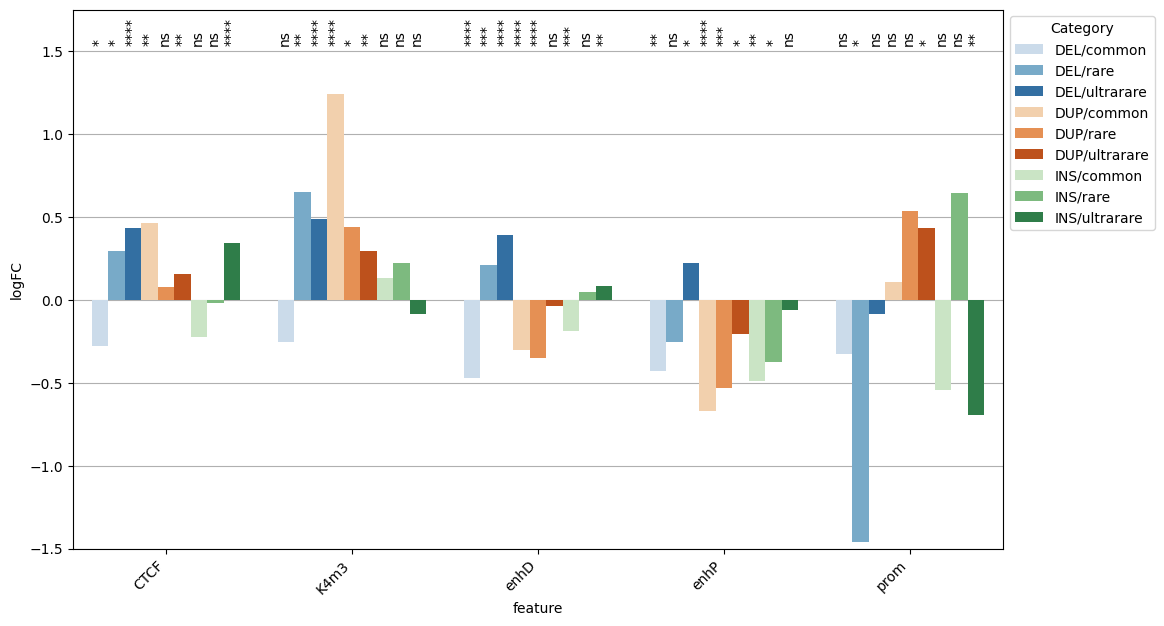

In [51]:
n = 3
level1="feature"
level2="category4"
level_y="logFC"

# error choice: sd 
# errorBar=("sd" , 2)
# errorBar=("ci" , 95)
# errorBar=("se" ,2 )
# errorBar=("pi" , 95)

y_asterix=1.55
ylimit=(-1.5,y_asterix+0.2)


################################
diverging_colors = sns.color_palette("Blues", n) + sns.color_palette("Oranges", n) + sns.color_palette("Greens", n) + sns.color_palette("Purples", n) + sns.color_palette("Reds", n) + sns.color_palette("Greys", n)

iter_df.sort_values([level1, level2], inplace=True)
# Re-sort main_vcf_df due to iteration over plots.patches is done on the category level first
main_vcf_df.sort_values([level2, level1], inplace=True)

fig, ax = plt.subplots(figsize=(12,7), dpi=100)
#plots = sns.barplot( x=level1 , y=level_y , hue=level2 , data=iter_df, ax=ax, zorder=2 , palette = diverging_colors , errorbar= errorBar )
plots = sns.barplot( x=level1 , y=level_y , hue=level2 , data=main_vcf_df, ax=ax, zorder=2 , palette = diverging_colors )
plt.xticks(rotation=45, ha="right")
ax.grid(axis="y")
ax.legend(title ='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(ylim=ylimit)

# Manual annotation of barplot
# https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
# obtain asterix annotation as list after sorting
asterix=main_vcf_df["asterix"].tolist()

for iter_i , bar in enumerate(plots.patches):
    if( iter_i < len(asterix)):
        plots.text(x=bar.get_x(), y=y_asterix, s= asterix[iter_i] , rotation="vertical")
